## 목표
 - 타이타닉 데이터를 활용하여 생존자, 사망자를 예측해보기
 - kaggle 경진대회에 참가해서 점수 확인해보기
 - 머신러닝의 전체 과정 체험해보기

### 머신러닝 과정
 1. 문제 정의 : 목표설정, 어떤 모델 쓸지 설정
 2. 데이터 수집 : 분류를 할거라면 class로 담긴 레이블이 있는 데이터를 수집해야함
 3. 데이터 전처리 : 이상치/결측치 처리, 특성 처리(특성공학)
 4. 데이터 탐색(탐색적 데이터 분석) : 기술 통계, 특성 간의 관계
 5. 모델링
    - (1) 모델 선택 및 하이퍼 파라미터 설정
    - (2) 모델 예측 및 평가
    - (3) 모델 서비스화

train- 학습용 문제, 답

test - 테스트용 문제  -> 답은 kaggle 가지고 있음
#### pre 잘했는지 평가하기 위해서 kaggle 업로드
submission - pre를 제출하기 위한 답안지 파일 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 시각화 라이브러리
import seaborn as sns
# train / test 분리 도구
from sklearn.model_selection import train_test_split

# 평가 도구
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# tree model : 사망 , 생존 이진분류

In [2]:
# train , test 변수에 데이터 불러와서 담기
train = pd.read_csv("data/titanic/train.csv" , index_col="PassengerId")
test = pd.read_csv("data/titanic/test.csv", index_col="PassengerId")


     0   Survived  - 생존/ 사망 여부 (답 데이터, Class Label)
     1   Pclass    - 승객의 등급(1- 귀족층,2- 중간층,3- 하위계층)
     2   Name      - 이름      
     3   Sex       - 성별(male, female)
     4   Age       - 나이(0~
     5   SibSp     - 형제자매+배우자 수
     6   Parch     - 부모 + 자식 수
     7   Ticket    - 티겟 번호
     8   Fare      - 요금
     9   Cabin     - 객실번호
     10  Embarked  - 승선항

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [5]:
# 크기 확인
print('train 크기:', train.shape)
print('test 크기:', test.shape)
# test 정답 데이터가 없음 : 하나가 적음

train 크기: (891, 11)
test 크기: (418, 10)


In [6]:
# 컬럼명만 뽑아서 확인하기
print(train.columns)
print(test.columns)

# 컬럼의 순서도 중요함
# 컬럼의 명도 동일해야함

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


### 데이터 전처리 및 데이터 탐색

#### 결측치 확인

In [7]:
# info 함수 활용해 train, test 결측치 확인
train.info()
# 결측치 존재 컬럼 : Age(714),Cabin(204),Embarked(889)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
# 판다스 함수 통해서 결측치 확인
# 데이터 자리에 결측치가 있니? -> .isnull()
# True : 1 / False : 0 => 다 더하면 null값이 몇개인지 알 수 있음
test.isnull().sum()
# Age(332),Fare(417),Cabin(91)

# 결측치(행)를 삭제하기 보단 채우면서 처리해보자!

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

#### train-Embarked 결측치 처리
- 승객이 탑승한 항구 이름

In [9]:
# train 데이터 기준으로 embarked 컬럼 확인
train['Embarked'].unique()
# nan : 결측치

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# 빈도수가 높은 승선항 알파벳으로 결측치 처리하기
train['Embarked'].value_counts()
train[train['Embarked'].isnull()][['Embarked']]

,Embarked
PassengerId,
62,NaN
830,NaN


In [11]:
# 모델 학습 : 모델이 모델링을 잘하도록 데이터를 셋팅
# test 데이터는 모델을 일반화시키는데 도움이 되지 않음
# train 데이터가 학습할 때 사용되고 모델의 일반화에 도움을 줌

# Embarked 결측치를 'S'로 채우기 : 최빈값을 기준으로 채우기
# fillna(채울값)
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
# Embarked 컬럼에 결측치가 있던 행의 정보를 확인하고
# 비슷한 사람의 데이터가 있다면 그 사람의 승선항 정보를 대체값을 활용

#### test - Fare(요금) 컬럼 결측치 처리
 - 요금 평균, 중앙값 계산 가능
 - 데이터 분석을 진행하면서 관련이 있을 법한 컬럼을 연관지어서 대체값을 확인해보기

In [13]:
# train 데이터(학습시키는 문제 데이터)를 기준으로 데이터 탐색

# Fare 컬럼 정보(기술통계량) 확인 : .describe()
train.Fare.describe()
# 요금의 대표값으로 평균보다 중앙값이 더 나을 것 같다는 판단
# train.Fare.median()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
# 변수(특성) 간의 상관관계 확인
# 상관계수(숫자) : -1 ~ 1
# 각 컬럼의 상관 정도를 수치로 표현한 값 : 상관계수
# .corr() : 상관계수 함수
# 원인과 결과에 대한 인과관계 설명은 아님
# -1,1에 가까울수록 변수간의 관계성이 있음
# 0에 가까울수록 변수간의 관계성이 적으

# .abs() : 절댓값 함수
# 생존 사망과 연관이 있는 컬럼 확인해보기
# Pclass가 생존/사망 연관성이 있을 수 있겠음
train.corr()['Survived'].abs()

# 등급에 따라 요금의 중앙값으로 채워주는 것도 의미가 있을 것으로 보임

C:\Users\gjaischool1\AppData\Local\Temp\ipykernel_8328\3224660648.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['Survived'].abs()


Survived    1.000000
Pclass      0.338481
Age         0.077221
SibSp       0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [15]:
# train[['Pclass','Fare']].groupby(by='Pclass',as_index=False).median()
# Pclass, Fare컬럼을 동시에 같이 불러와서 Pclass컬럼 기준으로(by) 묶어서 인덱스 값으로 자동으로 설정(as_index=True ,
# False하면 by값이 자동으로 인덱스로 설정되지 않고 새로운 인덱스가 따로 설정(0,1,2,3...))
# -> 집계함수 사용가능(Fare컬럼이 있으니까 계산할 컬럼이 있음) 
# by(그룹바이 기준컬럼)값 제외하고 남아있는 컬럼에 대해서 자동으로 집계해줌 : 집계함수 사용해서 원하는 값 계산(.median)해서
# 하나의 새로운 데이터프레임이 생성되는 개념
med = train[['Pclass','Fare']].groupby(by='Pclass').median()
med['Fare'].iloc[2]

8.05

In [16]:
# test - Fare 컬럼에 결측치가 있는 행 정보 출력하기
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [17]:
test['Fare']=test['Fare'].fillna(8.0500)
test['Fare']=test['Fare'].fillna(med['Fare'].iloc[2])

In [18]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Age 컬럼 결측치 채우기
 - 단순 기술 통계로만 채우지 않고, 다른 컬럼과의 상관관계를 이용해서 결측치를 채워보는 방향으로 진행해보자
 - 생존/사망을 예측하는 데 영향을 줄만한(상관관계가 높은) 요소를 활용해보자
   - Pclass,Sex 컬럼 활용해서 Age 통계 확인해보기

In [20]:
# train Age 컬럼 접근해서 기술 통계량 확인하기
train['Age'].describe()
# 평균, 중앙값의 큰 차이가 없음
# => 평균치로 데이터 처리해보기

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# train.loc[:,['Age','Sex','Pclass']]
asp = train[['Age','Sex','Pclass']].groupby(by=["Pclass",'Sex']).mean()
asp

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [22]:
# asp(groupby결과)
# 인덱스가 2개 : 멀티인덱스(중복인덱스)
# 컬럼은 []로 묶어줌(패킹), 인덱스는 튜플로 () 묶어줌(패킹)

# female 평균나이 데이터 접근해보기
asp.loc[(3,'female')]

asp.loc[(1,'male')]

Age    41.281386
Name: (1, male), dtype: float64

In [23]:
# train Age컬럼의 결측치가 있는 행 정보 출력

train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [24]:
# numpy 안에 null값 확인하는 함수
# Nan
a=np.array([1,2,np.nan])
# nan값이 있으면 true
np.isnan(a[2])

True

In [25]:
# 복잡한 처리를 해줄 수 있는 도구가 있나?
# 사용자 정의 함수 생성 : Pclass , Sex 을 확인해서 asp에 있는 평균나이로 대체(결측치 채우기)
# 판다스 데이터랑 어떻게 연결? : apply()
# train[['Pclass','Sex']].apply(사용자함수, axis=0 ) : 이 데이터에 요 함수 연결해서 실행시킬거야

def fill_age(data):
    if np.isnan(data['Age']):
        asp_age = asp.loc[(data['Pclass'],data['Sex'])]
        return asp_age
    # 결측치가 없으면 원래 나이값을 반환
    else:
        return data['Age']
                          
train['Age'] = train.apply(fill_age , axis=1).astype('int64')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


    def test_func(data):
        print(data['Pclass'], data['Sex'])
    
    train[['Pclass','Sex']].apply(test_func , axis=1)
 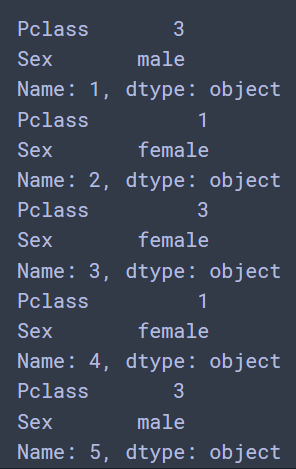   
   
axis=0 : (가로한줄로 밑으로) ↓ 행방향 , axis=1 : (세로한줄로 옆으로) → 열방향

axis=1 : 열방향 -> 하나의 행이 시리즈 형태로 담겨서 출력

    def test_func(data):
        print(data)
    
    train.apply(test_func , axis=1)
    
    - 한사람에 대한 정보가 처리단위로 연결



In [26]:
# test Age 결측치 처리하기
test['Age'] = test.apply(fill_age , axis=1).astype('int64')
# test 결측치를 채울 때 train(모델의 일반화 도움을 주는) 데이터를 기준으로 채워줌
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### Cabin 컬럼 결측치 채우기

In [27]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
def test_func(data):
    print(data)
    
train.apply(test_func, axis=0)

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64
PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64
PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object
PassengerId
1     

Survived    None
Pclass      None
Name        None
Sex         None
Age         None
SibSp       None
Parch       None
Ticket      None
Fare        None
Cabin       None
Embarked    None
dtype: object

In [29]:
# 임의로 Cabin 컬럼 결측치 'M'으로 채우기
# train['Cabin']=train['Cabin'].fillna('M')
train['Cabin'].fillna('M', inplace=True)

test['Cabin']=test['Cabin'].fillna('M')

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

In [30]:
# train Cabin 접근해서 살펴보기
train['Cabin'][2][0]   #'C'
# 판다스.str : 해당 컬럼에 문자열 자료에 접근하는 키워드
train['Deck'] = train['Cabin'].str[0]
# 새로운 컬럼에 따로 담아서 분리
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,M
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,M,S,M
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,M,S,M


In [31]:
test['Deck']=test['Cabin'].str[0]
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,M
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,M,S,M
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,M,Q,M
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,M,S,M
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,M,S,M
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,M,S,M


In [32]:
# Cabin 컬럼 삭제하기
test.drop(columns='Cabin',axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### 데이터 탐색
 - train 데이터를 이용해서 탐색 진행함
 - test를 탐색하는 것은 모델의 일반화에 도움이 안됨
 - DECK 컬럼이 생존/사망과 얼마나 연관있는지 확인해보기

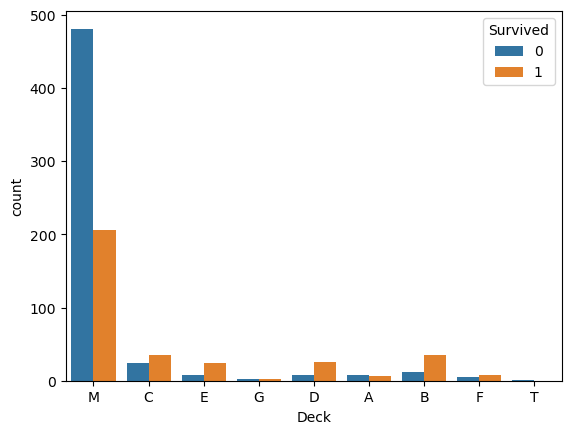

In [33]:
# X - Deck, y- Survived
sns.countplot(data=train, x='Deck', hue='Survived')
plt.show()

 - M에서 상대적으로 사람이 많이 사망했음
 - Pclass , Survived 컬럼의 관계확인 : Pclass가 생존/사망과 연관이 있는지 확인

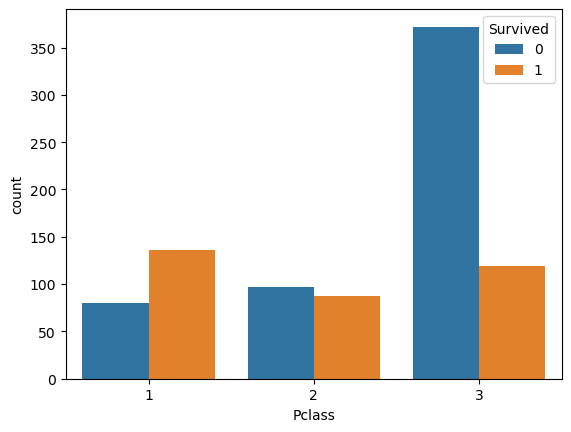

In [34]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.show()

 - 승객의 등급이 높을수록 비교적 생존율이 높음
 - 3등급의 승객들은 많이 사망함
 - Deck과 Pclass 시각화

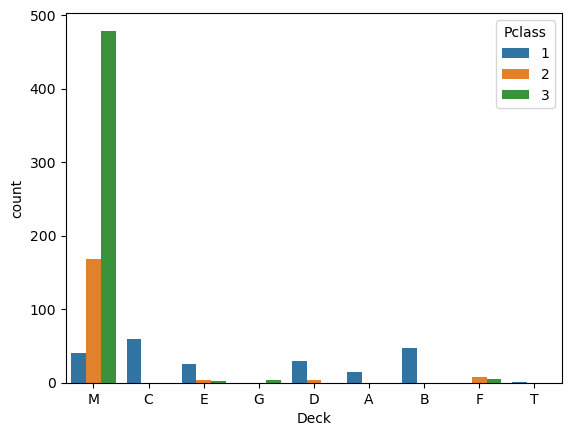

In [35]:
sns.countplot(data=train, x='Deck', hue='Pclass')
plt.show()

 - M(결측치)안에는 3등급의 사람들이 많아서 사망률이 높게 출력
 - Sex과 Survived 관계 확인해보기

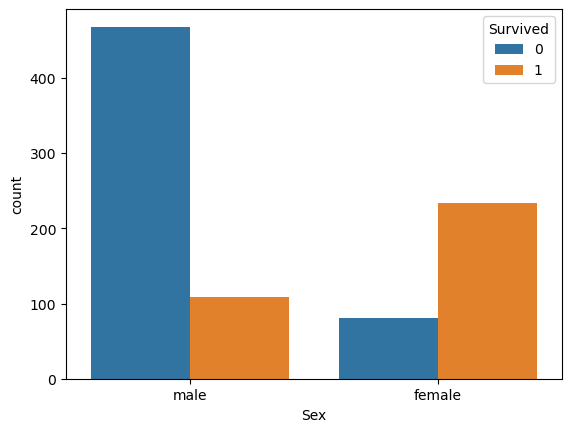

In [36]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()

 - male 사망률이 높음, female 

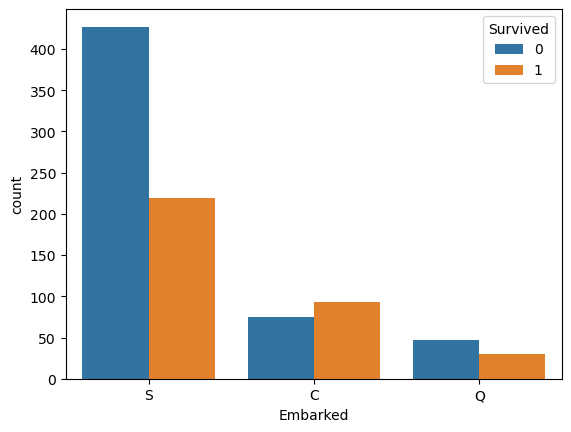

In [37]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.show()

#### Embarked와 Pclass 관계 확인
 - Age에 따른 생존/사망 시각화
 - 데이터의 분포를 확인할 때 여러가지 시각화 방법을 활용하는데, 그 중에 하나인 바이올린 플롯을 활용

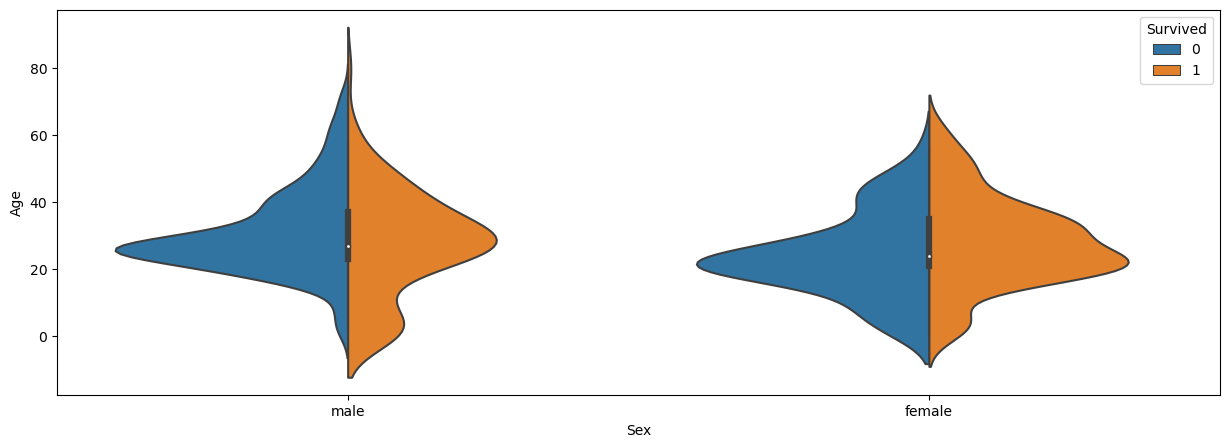

In [38]:
plt.figure(figsize = (15,5))   # x 15, y 5
sns.violinplot(data= train, x='Sex', y='Age', hue='Survived', split=True)
plt.show()

 - 20 ~ 40대 사이에 사망이 많았음
 - 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존했음
 - Fare에 따른 생존/사망 시각화

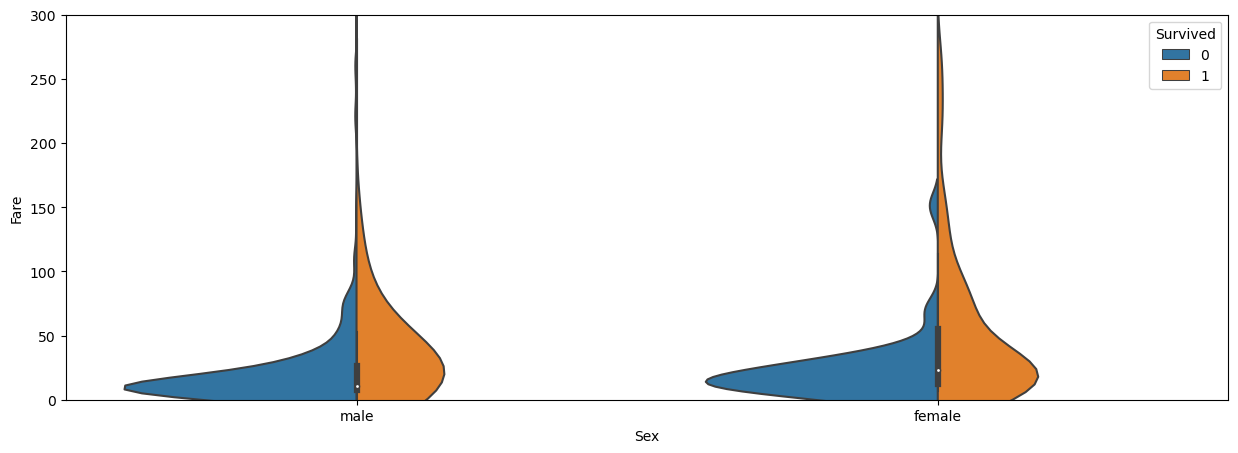

In [39]:
plt.figure(figsize = (15,5)) 
sns.violinplot(data= train, x='Sex', y='Fare', hue='Survived', split=True)
# 0 ~ 300 y축 범위 제한
plt.ylim(0,300)
plt.show()

In [40]:
# Fare 기술 통계량 확인
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

 - 요금이 저렴한 사람은 상대적으로 많이 사망했음

#### 가족의 수 컬럼 생성
 - 기존의 컬럼을 가지고 새로운 컬럼을 생성 : 특성공학 분야 중 하나
 - 가족의 수 : SibSp(형제자매, 배우자) + Parch(부모, 자식) +1(나)
 - train, test 두개 모두 컬럼 생성 진행

In [41]:
# SibSp + Parch + 1 => Family_size 컬럼 추가
# train, test
train['Family_size'] = train['SibSp'] + train['Parch'] + 1
train['Family_size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_size, Length: 891, dtype: int64

In [42]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_size
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,M,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,M,2
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,M,1
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,M,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,M,3
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,S,M,1
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,M,1


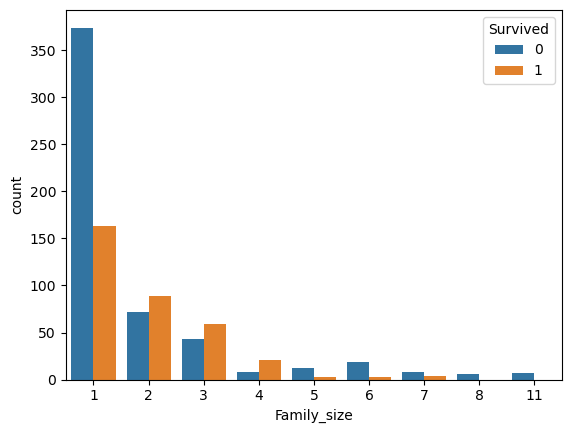

In [43]:
# 가족의 수 컬럼 이용해서 생존/사망 시각화
sns.countplot(data=train, x='Family_size', hue='Survived')
plt.show()

- 1명일때는 사망 비율이 높고, 2~4명일 때는 생존 비율이 높고, 5명이상이면 사망 비율이 높음
- 사소한 관찰의 오류를 줄이기 위해서 범주를 줄여보자 : binning

In [44]:
# 가족의 수가 1이면 Alone, 2~4명이면 Small, 5명이상이면 Large
# train, test 적용
# 연속적인 수치값을 범주화(카테고리화) 사용하는 pandas 함수 : pd.cut()

# (1) 범위(구간)에 대한 이름 설정 : bins
user_bins = [0,1,4,11]
# 범위의 시작값은 포함되지 X

# (2) 범위 이름 설정 : Labels
user_labels = ['Alone','Small','Large']

# (3) binning할 데이터를 cut()에 연결
train['Family_group']=pd.cut(train['Family_size'], bins=user_bins,labels=user_labels)
test['Family_group']=pd.cut(test['Family_size'], bins=user_bins,labels=user_labels)

In [45]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_size,Family_group
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,M,1,Alone
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,M,2,Small
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,M,1,Alone
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,M,1,Alone
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,M,3,Small
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,S,M,1,Alone
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,C,1,Alone
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,M,1,Alone


In [46]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_size,Family_group
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,M,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,M,1,Alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C,2,Small
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,M,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,M,S,M,1,Alone
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,B,1,Alone
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,M,S,M,4,Small


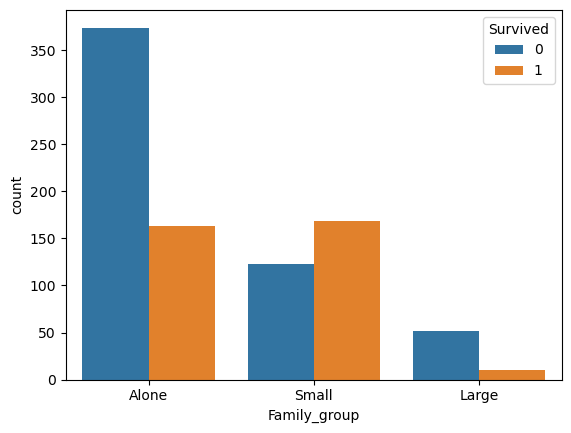

In [47]:
sns.countplot(data=train, x='Family_group', hue='Survived')
plt.show()

#### 불필요한 컬럼 삭제
 - drop(), 삭제할 이름이 있는 방향으로 axis(=1)를 설정
 - 전처리 대상에서 제외되거나, 전처리 후 불필요한 컬럼 삭제
 - Ticket, Name, Family_size 삭제
 - train, test 적용


In [48]:
train.drop(columns=['Ticket','Name','Family_size'],axis=1,inplace=True)
test.drop(columns=['Ticket','Name','Family_size'],axis=1,inplace=True)

In [49]:
train.drop(columns='Cabin',axis=1,inplace=True)
train.info()   # 10개
test.info()    # 9개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 102.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Ag

#### 문제 / 답 데이터로 분리

In [50]:
# 훈련문제, 훈련 답
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

# 테스트문제
X_test = test

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    object  
 7   Deck          891 non-null    object  
 8   Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 95.9+ KB


In [52]:
# 문자열 형테의 데이터를 숫자 형태로 바꿔줘야함
# 머신러닝은 숫자형 데이터만 이해가능

# 범주 -> 수치(원핫인코딩)
# 인코딩해야하는 컬럼 찾기
# 데이터의 타입에 대한 질문으로 불리언 인덱싱 활용해보기
cat_filter = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
cat_choice = X_train.columns[cat_filter]
X_train[cat_choice]

,Sex,Embarked,Deck,Family_group
PassengerId,,,,
1,male,S,M,Small
2,female,C,C,Small
3,female,S,M,Alone
4,female,S,C,Small
5,male,S,M,Alone
...,...,...,...,...
887,male,S,M,Alone
888,female,S,B,Alone
889,female,S,M,Small


In [53]:
# 원핫인코딩 함수 : pd.get_dummies(대상)
X_train_ch_oh = pd.get_dummies(X_train[cat_choice])

# X_test 적용
X_test_ch_oh = pd.get_dummies(X_test[cat_choice])

# X_train과 원핫인코딩 데이터 합치기
X_train = pd.concat([X_train, X_train_ch_oh], axis=1)
X_train

# X_test와 원핫인코딩 데이터 합치기
X_test = pd.concat([X_test, X_test_ch_oh], axis=1)

# cat_choice 컬럼 삭제하기
X_train.drop(columns=cat_choice,axis=1,inplace=True)
X_test.drop(columns=cat_choice,axis=1,inplace=True)

In [54]:
X_train.shape , X_test.shape

((891, 22), (418, 21))

In [55]:
# set() 자료형
# 집합
# 합집합, 차집합, 교집합
# 중복 X, 순서 X
# 중복을 허용하지 않는 set 특징은 자료형의 중복을 제거하기 위한 필터 역할로 종종 사용됨
# 요소의 여부를 확인하기 위해서도 종종 사용
# 인덱싱으로 데이터에 접근하기 위해서는 리스트나 튜플로 형변환해서 사용해야 함
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [56]:
# list(set(X_train.columns))
X_test['Deck_T'] = 0

display(X_train.columns)
display(X_test.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object')

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large', 'Deck_T'],
      dtype='object')

In [57]:
# X_test 컬럼 순서를 X_train 컬럼 순서대로 맞추기
X_test = X_test[X_train.columns]
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Family_group_Alone,Family_group_Small,Family_group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
893,3,47,1,0,7.0000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
894,2,62,0,0,9.6875,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
895,3,27,0,0,8.6625,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
896,3,22,1,1,12.2875,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,26,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1306,1,39,0,0,108.9000,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1307,3,38,0,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


#### 모델링
 - 모델 선택 및 하이퍼 파라미터
 - 모델 학습
 - 모델 예측 및 평가
 

In [58]:
# tree 분류
tree_model = DecisionTreeClassifier()

In [59]:
# 학습
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
# 예측
pre = tree_model.predict(X_test)

In [61]:
# 정확도 측정
sub = pd.read_csv('data/titanic/gender_submission.csv')
sub['Survived'] = pre
sub.to_csv('titanic1.csv',index=False)

In [62]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
# tree_model : 모델 깊이 조정(하이퍼 마라미터 튜닝 조정)
tree_model = DecisionTreeClassifier(max_depth=5)
from sklearn.model_selection import cross_val_score

In [64]:
result = cross_val_score(tree_model, X_train, y_train, cv=5)
print(result.mean())

0.8103195028560668


In [65]:
# max_depth, min_smaples_split, max_leaf_nodes, min_samples_leaf
# 어떤 파라미터 값의 조합이 좋을지 찾아주는 방법을 연결해볼 수 있음 : 그리드 서치

tree_model.fit(X_train,y_train)
pre = tree_model.predict(X_test)

sub['Survived'] = pre
sub.to_csv('titanic2.csv',index=False)

### 자료 내보내기
- 분석에 사용한 파일(X_train, y_train, X_test) csv 파일로 내보내기
- 새로운 모델에 적용하기 위해

In [66]:
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)